In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-v0_8-whitegrid')

#### Text & Annotation

In [2]:
birth = pd.read_csv('data/births.csv')

In [3]:
quartiles = np.percentile(birth['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
birth = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [4]:

birth['day'] = birth['day'].astype(int)
birth.index = pd.to_datetime(10000 * birth['year'] +
                             100 * birth['month'] +
                             birth['day'], format='%Y%m%d')
birth_by_date = birth.pivot_table('births',
                                  [birth.index.month, birth.index.day])

In [5]:
from datetime import datetime

birth_by_date.index = [datetime(2012, month, day)
                       for (month, day) in birth_by_date.index]


In [6]:
birth_by_date.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)

<Axes: >

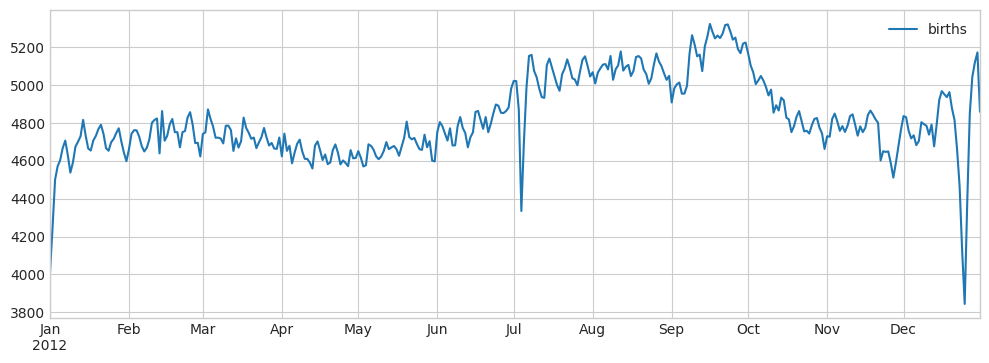

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
birth_by_date.plot(ax=ax)

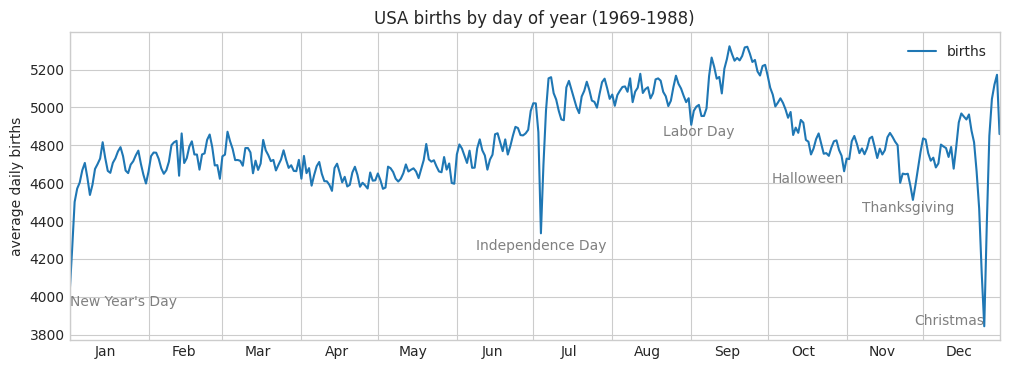

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
birth_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)

ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

- ax.transData: 資料座標相關轉換(default)
- ax.transAxes: 使用axes尺寸單位相關轉換
- fig.transFrigure: 使用figure尺寸單位相關轉換

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

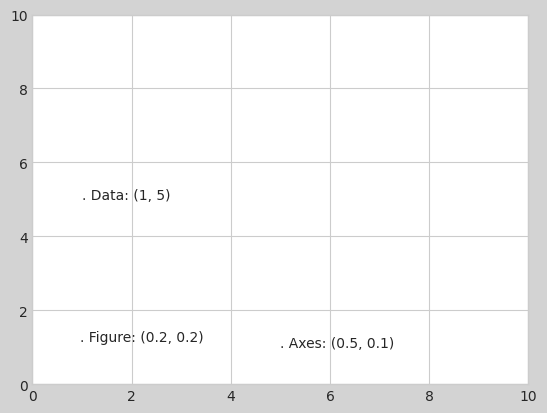

In [9]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes) # 從白色左下角起算
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure) # 從灰色左下角起算

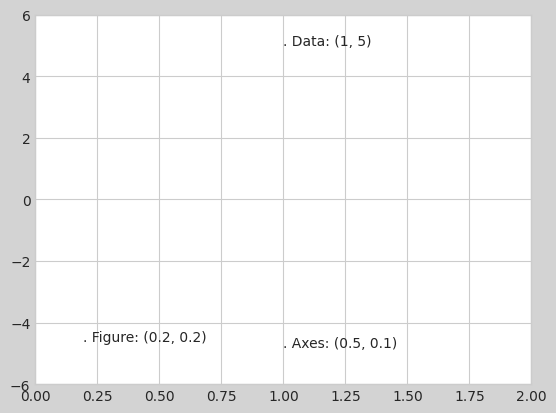

In [10]:
# 改變axes邊界只會影響ax.transData
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

#### 箭頭與註解
建議使用plt.annotate()

Text(2, -6, 'local minimum')

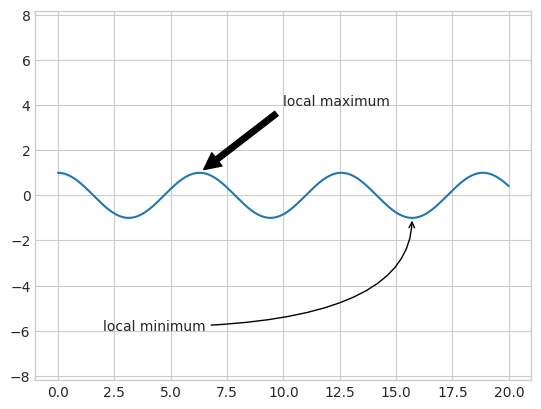

In [11]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3, angleA=0, angleB=-90"))

(3600.0, 5400.0)

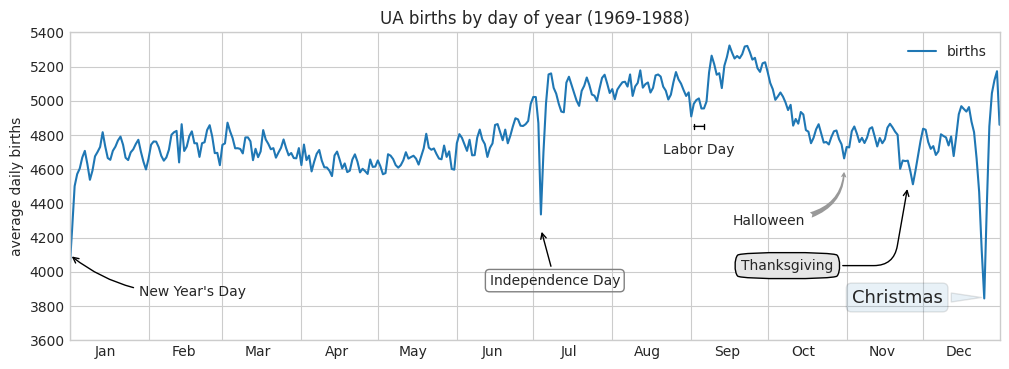

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
birth_by_date.plot(ax=ax)

ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3, rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={"arrowstyle": '|-|,widthA=0.2,widthB=0.2',})
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va='center',
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

ax.set(title='UA births by day of year (1969-1988)',
       ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400)

In [15]:
# reference: https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html
# locator: https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py